### Logistics Procurement Data Analyst - Marcela Cardenas - Exercise 

#### - Data Prep
* The python version used for this ex. is      3.7.4

In [1]:
import pandas as pd 
import numpy as np
from platform import python_version 
import datetime as dt
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(python_version()) # Version 3.7.4

3.7.4


In [24]:
#Original Data Set to be analyzed
shipment = pd.read_csv (r'/Users/marcelacardenas/Desktop/Interview_DataAnalyst/shipmentdata_datanalystexercise.csv') #read csd and convert DF

In [150]:
#Data set to map the missing states from the cities with NaN value for state
geo_usmx = pd.read_csv (r'/Users/marcelacardenas/Desktop/Interview_DataAnalyst/country_us_mx.csv') #read csd and convert DF

### Data profiling start:

In [6]:
# data profiling data-types
dataType = shipment.dtypes
dataType

Record ID          int64
Shipment ID       object
Shipdate          object
Vendor ID          int64
O_COUNTRY         object
ORIG              object
ORIG_ZIP          object
D_COUNTRY         object
DEST              object
DEST_ZIP          object
Equipment Type    object
Cost               int64
Weight             int64
Mileage            int64
dtype: object

In [26]:
#Unique Countries Orign and Dest / Special char values (.)
shipment['O_COUNTRY'].unique()

array(['MX', 'US', 'CN', '.', 'ES', 'CA'], dtype=object)

In [27]:
#Unique Countries Orign and Dest / Special char values (.)
shipment['D_COUNTRY'].unique()

array(['MX', 'US', 'CA', '.', 'SA', 'FR', 'DU'], dtype=object)

In [22]:
#Count values by Dest Country
shipment.groupby(['D_COUNTRY']).agg({'count'})

,Record ID,Shipment ID,Shipdate,Vendor ID,O_COUNTRY,ORIG,ORIG_ZIP,DEST,DEST_ZIP,Equipment Type,Cost,Weight,Mileage
,count,count,count,count,count,count,count,count,count,count,count,count,count
D_COUNTRY,,,,,,,,,,,,,
.,21,21,21,21,21,21,19,21,15,21,21,21,21
CA,175,175,175,175,175,175,175,175,175,175,175,175,175
DU,1,1,1,1,1,1,1,1,0,1,1,1,1
FR,1,1,1,1,1,1,1,1,1,1,1,1,1
MX,18101,18101,18101,18101,18101,18100,18101,18101,18101,18101,18101,18101,18101
SA,1,1,1,1,1,1,1,1,1,1,1,1,1
US,7308,7308,7308,7308,7308,7308,7307,7308,7308,7308,7308,7308,7308


In [23]:
#Count values by Dest Country
shipment.groupby(['O_COUNTRY']).agg({'count'})

,Record ID,Shipment ID,Shipdate,Vendor ID,ORIG,ORIG_ZIP,D_COUNTRY,DEST,DEST_ZIP,Equipment Type,Cost,Weight,Mileage
,count,count,count,count,count,count,count,count,count,count,count,count,count
O_COUNTRY,,,,,,,,,,,,,
.,3,3,3,3,3,0,3,3,1,3,3,3,3
CA,5,5,5,5,5,5,5,5,5,5,5,5,5
CN,48,48,48,48,48,48,48,48,48,48,48,48,48
ES,4,4,4,4,4,4,4,4,4,4,4,4,4
MX,17999,17999,17999,17999,17999,17999,17999,17999,17997,17999,17999,17999,17999
US,7549,7549,7549,7549,7548,7549,7549,7549,7546,7549,7549,7549,7549


In [29]:
#get the total count for columns
shipment.describe() 

,Record ID,Vendor ID,Cost,Weight,Mileage
count,25608.000000,25608.000000,25608.000000,25608.000000,25608.000000
mean,12804.500000,18.259997,880.090987,6337.816112,384.580795
std,7392.537183,18.792289,1535.882430,12009.060153,535.506751
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6402.750000,2.000000,55.000000,0.000000,14.000000
50%,12804.500000,17.000000,351.000000,1.000000,131.000000
75%,19206.250000,24.000000,958.000000,8176.250000,495.000000
max,25608.000000,99.000000,59621.000000,129354.000000,4150.000000


In [32]:
#Sum of nun values by column
shipment.isnull().sum()

Record ID         0
Shipment ID       0
Shipdate          0
Vendor ID         0
O_COUNTRY         0
ORIG              1
ORIG_ZIP          3
D_COUNTRY         0
DEST              0
DEST_ZIP          7
Equipment Type    0
Cost              0
Weight            0
Mileage           0
dtype: int64

In [33]:
# check if there are duplicates Shipment ID
shipment['Shipment ID'].duplicated().any() 

True

In [34]:
#6089 records with shipments id duplicated
duplicate = shipment[shipment.duplicated(['Shipment ID'])]
duplicate

,Record ID,Shipment ID,Shipdate,Vendor ID,O_COUNTRY,ORIG,ORIG_ZIP,D_COUNTRY,DEST,DEST_ZIP,Equipment Type,Cost,Weight,Mileage
11,12,EXP7043,2/22/2020,1,MX,DURANGO,34000,MX,NUEVO LAREDO,88060,FB,0,0,0
13,14,EXP7047,2/24/2020,1,MX,DURANGO,34000,MX,NUEVO LAREDO,88060,FB,0,0,0
47,48,209609,11/11/2019,8,US,TX HOUSTON,77032,US,TX SAN ANTONIO,78220,DV,0,5421,0
76,77,4127B,1/29/2020,12,MX,APODACA,66600,MX,NUEVO LAREDO,88060,FB,0,0,0
99,100,72490,4/29/2020,10,MX,APODACA,66600,MX,NUEVO LAREDO,88284,FB,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25596,25597,544604,8/17/2020,89,US,TX SAN ANTONIO,78220,US,NC HIGH POINT,27263,DD,0,0,0
25597,25598,4957,8/14/2020,21,MX,NL APODACA,66600,MX,JA GUADALAJARA,44430,DV,767,0,474
25598,25599,4994,9/11/2020,21,MX,APODACA,66600,MX,TIJUANA,22415,DV,0,0,0
25599,25600,4996,9/15/2020,21,MX,APODACA,66600,MX,TEPOTZOTLAN,54616,DV,0,0,0


In [36]:
#shipment.loc[shipment['Shipment ID']=='544604'] #double checking a record with duplicate shipmentID

In [35]:
#changing data types
shipment = shipment.astype({"Record ID": str, "Shipment ID": str,'Vendor ID': str,'O_COUNTRY': str, 'ORIG': str,
                           'ORIG_ZIP': str,'D_COUNTRY': str, 'DEST': str, 'DEST_ZIP': str, 'Equipment Type': str,
                           'Cost': int, 'Weight': int, 'Mileage': int })

In [36]:
#Aggregation by Shipment ID
shipment_agg = shipment.groupby(['Shipment ID']).agg({'Cost':'sum','Weight':'sum','Mileage':'sum',
                                                            'O_COUNTRY':'first','Record ID': 'first','Vendor ID': 'first','O_COUNTRY': 'first','ORIG': 'first','ORIG_ZIP': 'first',
                                                            'D_COUNTRY': 'first', 'DEST': 'first', 'DEST_ZIP': 'first', 'Equipment Type': 'first'
                                                          ,'Shipdate':'first'}).reset_index()

In [33]:
#shipment_agg #double check

In [24]:
#shipment_agg.dtypes #double check

#### Data Profiling end.

## Data PREP start: 


#### Data Cleaning start: 


In [38]:
#Checking duplicates- False = duplicates on Shipment ID 
shipment_agg['Shipment ID'].duplicated().any()

False

In [54]:
# Filtering BY US MX
countries_to_keep = ['US', 'MX']
shipment_usmx = shipment_agg[shipment_agg.O_COUNTRY.isin(countries_to_keep) & shipment_agg.D_COUNTRY.isin(countries_to_keep)]

In [55]:
#double check fliter
shipment_usmx['O_COUNTRY'].unique()  

array(['US', 'MX'], dtype=object)

In [56]:
#double check fliter
shipment_usmx['D_COUNTRY'].unique() 

array(['US', 'MX'], dtype=object)

In [57]:
shipment_usmx = shipment_usmx[shipment_usmx['ORIG'].notnull()]  
shipment_usmx = shipment_usmx[shipment_usmx['DEST'].notnull()]

In [58]:
# Patterns found ORIG and DEST columns: 
# IF WORD_CNT = 1 THEN State = '' , City = WORDS[0..N] 
# IF WORD_CNT > 1 AND WORDS[0].LEN = 2 THEN State = WORDS[1] , City=WORDS[1..N]
# IF WORD_CNT > 1 AND WORDS[0].LEN > 2 THEN City = WORDS[0..N]

# IF LEN WORDS[0] == 2 THEN STATE 
# IF LEN WORDS[0] >= 3 THEN CITY #some cities have 2 words  

In [59]:
# to get the len of the first 'word' in the ORIG & DEST columns
shipment_usmx['name_length_orig']= shipment_usmx['ORIG'].str.split(" ",1)  
shipment_usmx['name_length_dest']= shipment_usmx['DEST'].str.split(" ",1) 
shipment_usmx['name_length_orig']= shipment_usmx['ORIG'].str.split(" ",1, expand = True)   
shipment_usmx['name_length_dest']= shipment_usmx['DEST'].str.split(" ",1, expand = True) 

In [60]:
#to get the len of the first 'word' and compare 
shipment_usmx['name_length_orig'] = shipment_usmx['name_length_orig'].str.len() 
shipment_usmx['name_length_dest'] = shipment_usmx['name_length_dest'].str.len()

In [61]:
#shipment_usmx['name_length_dest'].unique() #double check int values array LENg

In [62]:
#Applying REGEX to extract State from City
#Need to compare the leng of the first word
shipment_usmx.loc[shipment_usmx['name_length_orig'] == 2, 'State_Orig'] = shipment_usmx['ORIG'].str.extract(r"((?P<State_Orig>[A-Z]{2}))") #if the len first word is 2 get 2 CAP letters
shipment_usmx.loc[shipment_usmx['name_length_orig'] >= 3, 'City4_Orig'] = shipment_usmx['ORIG'].str.extract(r"((?P<City4_Orig>[A-Z]+\s[A-Z]+))") ##if the len first word >3 get all the word

In [63]:
#REGEX for different type of patterns in ORIG and DEST
shipment_usmx = shipment_usmx.join(shipment_usmx['ORIG'].str.extract(r"(\s(?P<City_Orig>[A-Z]+\s[A-Z]+))",expand=False)[['City_Orig']]) # 2 words: starts from the space +  other word
shipment_usmx = shipment_usmx.join(shipment_usmx['ORIG'].str.extract(r"(\s(?P<City2_Orig>[A-Z]+))",expand=False)[['City2_Orig']]) #1 word starts from the space
shipment_usmx = shipment_usmx.join(shipment_usmx['ORIG'].str.extract(r"((?P<City3_Orig>[A-Z]+))",expand=False)[['City3_Orig']]) #1 word NO space

In [64]:
#Applying REGEX to extract State from City
#Need to compare the leng of the first word
shipment_usmx.loc[shipment_usmx['name_length_dest'] == 2, 'State_Dest'] = shipment_usmx['DEST'].str.extract(r"((?P<State_Dest>[A-Z]{2}))")
shipment_usmx.loc[shipment_usmx['name_length_dest'] >= 3, 'City4_Dest'] = shipment_usmx['DEST'].str.extract(r"((?P<City4_Dest>[A-Z]+\s[A-Z]+))")

In [65]:
#REGEX for different type of patterns in ORIG and DEST
shipment_usmx = shipment_usmx.join(shipment_usmx['DEST'].str.extract(r"(\s(?P<City_Dest>[A-Z]+\s[A-Z]+))",expand=False)[['City_Dest']]) # 2 words: starts from the space +  other word
shipment_usmx = shipment_usmx.join(shipment_usmx['DEST'].str.extract(r"(\s(?P<City2_Dest>[A-Z]+))",expand=False)[['City2_Dest']]) #1 word starts from the space
shipment_usmx = shipment_usmx.join(shipment_usmx['DEST'].str.extract(r"((?P<City3_Dest>[A-Z]+))",expand=False)[['City3_Dest']]) #1 word NO space

In [66]:
#Replacing NaN values from columns to get only ONE colum
shipment_usmx.City_Orig.fillna(shipment_usmx.City2_Orig, inplace=True)
shipment_usmx.City_Orig.fillna(shipment_usmx.City3_Orig, inplace=True) 
shipment_usmx.City_Dest.fillna(shipment_usmx.City2_Dest, inplace=True)
shipment_usmx.City_Dest.fillna(shipment_usmx.City3_Dest, inplace=True)  

In [67]:
shipment_usmx #Double checking #NEED TO KEEP CELANING

,Shipment ID,Cost,Weight,Mileage,O_COUNTRY,Record ID,Vendor ID,ORIG,ORIG_ZIP,D_COUNTRY,...,State_Orig,City4_Orig,City_Orig,City2_Orig,City3_Orig,State_Dest,City4_Dest,City_Dest,City2_Dest,City3_Dest
0,1,15252,0,140,US,22947,75,TX LAREDO,78045,US,...,TX,NaN,LAREDO,LAREDO,TX,TX,NaN,LAREDO,LAREDO,TX
1,1.09069E+12,1893,17720,1245,US,4920,69,TX SAN ANTONIO,78220,US,...,TX,NaN,SAN ANTONIO,SAN,TX,WI,NaN,MONROE,MONROE,WI
2,1.11658E+12,245,0,1197,US,5773,69,TX SAN ANTONIO,78220,US,...,TX,NaN,SAN ANTONIO,SAN,TX,MN,NaN,SAINT PAUL,SAINT,MN
3,1.11809E+12,1889,33560,1206,US,12331,69,TX SAN ANTONIO,78220,US,...,TX,NaN,SAN ANTONIO,SAN,TX,MN,NaN,MINNEAPOLIS,MINNEAPOLIS,MN
4,1.12038E+12,1307,23376,781,US,17810,69,TX SAN ANTONIO,78220,US,...,TX,NaN,SAN ANTONIO,SAN,TX,MS,NaN,COLUMBUS,COLUMBUS,MS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,ST551,609,1,372,MX,19865,1,DURANGO,34000,MX,...,NaN,NaN,DURANGO,NaN,DURANGO,NaN,NaN,MONTERREY,NaN,MONTERREY
19515,ST552,610,1,372,MX,19528,1,DURANGO,34000,MX,...,NaN,NaN,DURANGO,NaN,DURANGO,NaN,NaN,MONTERREY,NaN,MONTERREY
19516,ST553,848,40000,372,MX,19866,1,DURANGO,34000,MX,...,NaN,NaN,DURANGO,NaN,DURANGO,NaN,NaN,MONTERREY,NaN,MONTERREY
19517,ST556,610,20000,372,MX,19529,1,DG DURANGO,34000,MX,...,DG,NaN,DURANGO,DURANGO,DG,NL,NaN,MONTERREY,MONTERREY,NL


In [68]:
# CITY4 column holds Cities with 2 WORDS - need to replace them in the City column 
# Example city4 has "Nuevo Laredo" 
to_keep_orig = shipment_usmx['City4_Orig'].unique()
to_keep_orig

array([nan, 'NUEVO LAREDO', 'SAN PEDRO', 'SAN LUIS', 'SAN NICOLAS',
       'IGNACIO ALLENDE', 'SANTA CATARINA', 'CDMX CIUDAD', 'CIENEGA DE'],
      dtype=object)

In [71]:
#shipment_usmx.loc[shipment_usmx['City4_Orig'] == 'NUEVO LAREDO'] 

In [72]:
# Replacing cities with 2 WORDS in City Colum
for i in to_keep_orig:
    print("shipment_usmx['City_Orig'] = np.where(shipment_usmx['City4_Orig'] == '{}' ,shipment_usmx['City4_Orig'] , shipment_usmx['City_Orig'])".format(i))

shipment_usmx['City_Orig'] = np.where(shipment_usmx['City4_Orig'] == 'nan' ,shipment_usmx['City4_Orig'] , shipment_usmx['City_Orig'])
shipment_usmx['City_Orig'] = np.where(shipment_usmx['City4_Orig'] == 'NUEVO LAREDO' ,shipment_usmx['City4_Orig'] , shipment_usmx['City_Orig'])
shipment_usmx['City_Orig'] = np.where(shipment_usmx['City4_Orig'] == 'SAN PEDRO' ,shipment_usmx['City4_Orig'] , shipment_usmx['City_Orig'])
shipment_usmx['City_Orig'] = np.where(shipment_usmx['City4_Orig'] == 'SAN LUIS' ,shipment_usmx['City4_Orig'] , shipment_usmx['City_Orig'])
shipment_usmx['City_Orig'] = np.where(shipment_usmx['City4_Orig'] == 'SAN NICOLAS' ,shipment_usmx['City4_Orig'] , shipment_usmx['City_Orig'])
shipment_usmx['City_Orig'] = np.where(shipment_usmx['City4_Orig'] == 'IGNACIO ALLENDE' ,shipment_usmx['City4_Orig'] , shipment_usmx['City_Orig'])
shipment_usmx['City_Orig'] = np.where(shipment_usmx['City4_Orig'] == 'SANTA CATARINA' ,shipment_usmx['City4_Orig'] , shipment_usmx['City_Orig'])
shipment_us

In [73]:
# CITY4 column holds Cities with 2 WORDS - need to replace them in the City column
to_keep_dest = shipment_usmx['City4_Dest'].unique()
to_keep_dest

array([nan, 'NUEVO LAREDO', 'POLANCO IV', 'CIUDAD JUAREZ', 'CIENEGA DE',
       'CIUDAD DEL', 'PLAYA DEL', 'ISLA MUJERES', 'LOS FRESNOS',
       'PUERTO VALLARTA', 'MINAS CRISTO', 'IXTAPA ZIHUATANEJO',
       'SAN PEDRO', 'CIENEGA D', 'SAN NICOLAS', 'ECATEPEC DE',
       'PINOTEPA NACIONAL', 'CIUDAD DE', 'INDUSTRIAL VALLEJ',
       'GOMEZ PALACIO', 'LAZARO CARDENAS', 'TOLUCA DE', 'BOSQUES DE',
       'CIUDAD OBREGON', 'ALFREDO V', 'NUEVO LEON'], dtype=object)

In [74]:
# Replacing cities with 2 WORDS in City Colum
for i in to_keep_dest:
    print("shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == '{}' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])".format(i))

shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'nan' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'NUEVO LAREDO' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'POLANCO IV' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'CIUDAD JUAREZ' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'CIENEGA DE' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'CIUDAD DEL' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'PLAYA DEL' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['C

In [75]:
#EXCECUTING THE CODE
shipment_usmx['City_Orig'] = np.where(shipment_usmx['City4_Orig'] == 'NUEVO LAREDO' ,shipment_usmx['City4_Orig'] , shipment_usmx['City_Orig'])
shipment_usmx['City_Orig'] = np.where(shipment_usmx['City4_Orig'] == 'SAN PEDRO' ,shipment_usmx['City4_Orig'] , shipment_usmx['City_Orig'])
shipment_usmx['City_Orig'] = np.where(shipment_usmx['City4_Orig'] == 'SAN LUIS' ,shipment_usmx['City4_Orig'] , shipment_usmx['City_Orig'])
shipment_usmx['City_Orig'] = np.where(shipment_usmx['City4_Orig'] == 'SAN NICOLAS' ,shipment_usmx['City4_Orig'] , shipment_usmx['City_Orig'])
shipment_usmx['City_Orig'] = np.where(shipment_usmx['City4_Orig'] == 'IGNACIO ALLENDE' ,shipment_usmx['City4_Orig'] , shipment_usmx['City_Orig'])
shipment_usmx['City_Orig'] = np.where(shipment_usmx['City4_Orig'] == 'SANTA CATARINA' ,shipment_usmx['City4_Orig'] , shipment_usmx['City_Orig'])
shipment_usmx['City_Orig'] = np.where(shipment_usmx['City4_Orig'] == 'CDMX CIUDAD' ,shipment_usmx['City4_Orig'] , shipment_usmx['City_Orig'])
shipment_usmx['City_Orig'] = np.where(shipment_usmx['City4_Orig'] == 'CIENEGA DE' ,shipment_usmx['City4_Orig'] , shipment_usmx['City_Orig'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'NUEVO LAREDO' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'POLANCO IV' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'CIUDAD JUAREZ' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'CIENEGA DE' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'CIUDAD DEL' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'PLAYA DEL' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'ISLA MUJERES' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'LOS FRESNOS' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'PUERTO VALLARTA' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'MINAS CRISTO' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'IXTAPA ZIHUATANEJO' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'SAN PEDRO' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'CIENEGA D' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'SAN NICOLAS' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'ECATEPEC DE' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'PINOTEPA NACIONAL' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'CIUDAD DE' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'INDUSTRIAL VALLEJ' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'GOMEZ PALACIO' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'LAZARO CARDENAS' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'TOLUCA DE' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'BOSQUES DE' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'CIUDAD OBREGON' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'ALFREDO V' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])
shipment_usmx['City_Dest'] = np.where(shipment_usmx['City4_Dest'] == 'NUEVO LEON' ,shipment_usmx['City4_Dest'] , shipment_usmx['City_Dest'])

In [121]:
# shipment_usmx to be cleaned dropping unnecesary columns for next operations
shipment_usmx_clean = shipment_usmx.drop(['City2_Orig', 'City3_Orig','City4_Orig','City2_Dest', 'City3_Dest','City4_Dest','name_length_dest','name_length_orig'], axis = 1) 

In [132]:
shipment_usmx_clean['City_Orig'] = shipment_usmx_clean['City_Orig'].str.title() 
shipment_usmx_clean['City_Dest'] = shipment_usmx_clean['City_Dest'].str.title() 

In [133]:
#Almost Clean BUT a lot of NAN values in the STATE 
#NEED TO: MAP the cities with the State external DB !
shipment_usmx_clean #need to keep cleaning

,Shipment ID,Cost,Weight,Mileage,O_COUNTRY,Record ID,Vendor ID,ORIG,ORIG_ZIP,D_COUNTRY,DEST,DEST_ZIP,Equipment Type,Shipdate,State_Orig,City_Orig,State_Dest,City_Dest
0,1,15252,0,140,US,22947,75,TX LAREDO,78045,US,TX LAREDO,78045,DV,6/18/2020,TX,Laredo,TX,Laredo
1,1.09069E+12,1893,17720,1245,US,4920,69,TX SAN ANTONIO,78220,US,WI MONROE,53566,FB,2/24/2020,TX,San Antonio,WI,Monroe
2,1.11658E+12,245,0,1197,US,5773,69,TX SAN ANTONIO,78220,US,MN SAINT PAUL,55101,DV,4/16/2020,TX,San Antonio,MN,Saint Paul
3,1.11809E+12,1889,33560,1206,US,12331,69,TX SAN ANTONIO,78220,US,MN MINNEAPOLIS,55432,FB,4/10/2020,TX,San Antonio,MN,Minneapolis
4,1.12038E+12,1307,23376,781,US,17810,69,TX SAN ANTONIO,78220,US,MS COLUMBUS,39701,FB,4/15/2020,TX,San Antonio,MS,Columbus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,ST551,609,1,372,MX,19865,1,DURANGO,34000,MX,MONTERREY,64000,DV,9/23/2020,NaN,Durango,NaN,Monterrey
19515,ST552,610,1,372,MX,19528,1,DURANGO,34000,MX,MONTERREY,64000,DV,9/29/2020,NaN,Durango,NaN,Monterrey
19516,ST553,848,40000,372,MX,19866,1,DURANGO,34000,MX,MONTERREY,64000,FB,9/21/2020,NaN,Durango,NaN,Monterrey
19517,ST556,610,20000,372,MX,19529,1,DG DURANGO,34000,MX,NL MONTERREY,64000,DV,9/25/2020,DG,Durango,NL,Monterrey


In [124]:
# +2K NULL values for State 
shipment_usmx_clean.isnull().sum() 

Shipment ID          0
Cost                 0
Weight               0
Mileage              0
O_COUNTRY            0
Record ID            0
Vendor ID            0
ORIG                 0
ORIG_ZIP             0
D_COUNTRY            0
DEST                 0
DEST_ZIP             0
Equipment Type       0
Shipdate             0
State_Orig        2185
City_Orig            1
State_Dest        2230
City_Dest            0
dtype: int64

In [185]:
#shipment_usmx_clean.loc[shipment_usmx_clean['Shipment ID'] == '4101B']   #checkpoint

In [143]:
missing_state = shipment_usmx_clean[shipment_usmx_clean.State_Orig.isna() | shipment_usmx_clean.State_Dest.isna()]

In [144]:
#ALL the fields HAVING NULL values on State Orig and Dest on missing state DF
#going to MAP on next steps
missing_state 

,Shipment ID,Cost,Weight,Mileage,O_COUNTRY,Record ID,Vendor ID,ORIG,ORIG_ZIP,D_COUNTRY,DEST,DEST_ZIP,Equipment Type,Shipdate,State_Orig,City_Orig,State_Dest,City_Dest
50,11237,469,7649,131,MX,20965,70,NUEVO LAREDO,88060,MX,APODACA,66600,FB,3/6/2020,NaN,Nuevo Laredo,NaN,Apodaca
51,11244,1180,3400,131,MX,16785,70,NUEVO LAREDO,88060,MX,APODACA,66600,DD,6/12/2020,NaN,Nuevo Laredo,NaN,Apodaca
52,11245,1180,5100,131,MX,16784,70,NUEVO LAREDO,88060,MX,APODACA,66600,DD,6/12/2020,NaN,Nuevo Laredo,NaN,Apodaca
58,11251,555,10203,131,MX,5885,70,NUEVO LAREDO,88060,MX,APODACA,66600,FB,2/14/2020,NaN,Nuevo Laredo,NaN,Apodaca
59,11252,555,10200,131,MX,5590,70,NUEVO LAREDO,88060,MX,APODACA,66600,FB,2/10/2020,NaN,Nuevo Laredo,NaN,Apodaca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19505,ST542,595,1,372,MX,19524,1,DURANGO,34000,MX,MONTERREY,64000,DV,8/21/2020,NaN,Durango,NaN,Monterrey
19506,ST543,432,1,378,MX,19525,1,DURANGO,34000,MX,APODACA,66600,DV,8/25/2020,NaN,Durango,NaN,Apodaca
19514,ST551,609,1,372,MX,19865,1,DURANGO,34000,MX,MONTERREY,64000,DV,9/23/2020,NaN,Durango,NaN,Monterrey
19515,ST552,610,1,372,MX,19528,1,DURANGO,34000,MX,MONTERREY,64000,DV,9/29/2020,NaN,Durango,NaN,Monterrey


In [186]:
#missing_state.loc[missing_state['Shipment ID'] == '4101B']  #checkpoint

In [188]:
#missing_state['City_Orig'].unique()  #MISSING state for the following cities ORIG

In [189]:
#missing_state['D_COUNTRY'].unique() #double check 

In [92]:
#missing_state['City_Dest'].unique() #MISSING state the following cities DEST

In [147]:
#CREATE DataFrame filtering COUNTRY
missing_state_mx_orig = missing_state[(missing_state['O_COUNTRY'] == "MX")]
missing_state_us_orig = missing_state[(missing_state['O_COUNTRY'] == "US")]
missing_state_mx_dest = missing_state[(missing_state['D_COUNTRY'] == "MX")]
missing_state_us_dest = missing_state[(missing_state['D_COUNTRY'] == "US")]

In [151]:
#READ A CSV CONTAINING ALL THE CITIES - STATE - FOR US AND MX to MAP the CITY and GET the STATE
geo_usmx = geo_usmx.drop(['subdivision_1_name','locale_code', 'continent_code','continent_name','subdivision_1_iso_code','time_zone','metro_code','subdivision_2_iso_code','subdivision_2_name','geoname_id'], axis = 1)
geo_usmx = geo_usmx.rename(columns={'subdivision_hasc_code': 'State_code'})

In [152]:
geo_mx = geo_usmx[(geo_usmx['country_iso_code'] == "MX")]
geo_us = geo_usmx[(geo_usmx['country_iso_code'] == "US")]

In [153]:
#Create a DICTIONARY with Keys as City_Name and values the State Code
mydict_mx = dict(zip(geo_mx.city_name, geo_mx.State_code))
mydict_us = dict(zip(geo_us.city_name, geo_us.State_code))

In [154]:
#LOGIC: IF the missing State is values of Dictionary - map and get the STATE CODE
missing_state_mx_orig.loc[missing_state_mx_orig['City_Orig'].isin(mydict_mx.keys()), 'State_Orig'] = missing_state_mx_orig['City_Orig'].map(mydict_mx)
missing_state_mx_dest.loc[missing_state_mx_dest['City_Dest'].isin(mydict_mx.keys()), 'State_Dest'] = missing_state_mx_dest['City_Dest'].map(mydict_mx)
missing_state_us_orig.loc[missing_state_us_orig['City_Orig'].isin(mydict_us.keys()), 'State_Orig'] = missing_state_us_orig['City_Orig'].map(mydict_us)
missing_state_us_orig.loc[missing_state_us_orig['City_Dest'].isin(mydict_us.keys()), 'State_Dest'] = missing_state_us_dest['City_Dest'].map(mydict_us)

In [465]:
#missing_state_us_orig

In [466]:
#missing_state_mx_orig

In [467]:
#missing_state_mx_dest

In [155]:
#Replacing NaN values from columns to get only ONE colum
missing_state.State_Orig.fillna(missing_state_mx_orig.State_Orig, inplace=True)
missing_state.State_Dest.fillna(missing_state_mx_dest.State_Dest, inplace=True)
missing_state.State_Orig.fillna(missing_state_us_orig.State_Orig, inplace=True)
missing_state.State_Dest.fillna(missing_state_us_dest.State_Dest, inplace=True)

In [156]:
#NOW the CITY is Mapped with a STATE CODE
missing_state 

,Shipment ID,Cost,Weight,Mileage,O_COUNTRY,Record ID,Vendor ID,ORIG,ORIG_ZIP,D_COUNTRY,DEST,DEST_ZIP,Equipment Type,Shipdate,State_Orig,City_Orig,State_Dest,City_Dest
50,11237,469,7649,131,MX,20965,70,NUEVO LAREDO,88060,MX,APODACA,66600,FB,3/6/2020,NL,Nuevo Laredo,NL,Apodaca
51,11244,1180,3400,131,MX,16785,70,NUEVO LAREDO,88060,MX,APODACA,66600,DD,6/12/2020,NL,Nuevo Laredo,NL,Apodaca
52,11245,1180,5100,131,MX,16784,70,NUEVO LAREDO,88060,MX,APODACA,66600,DD,6/12/2020,NL,Nuevo Laredo,NL,Apodaca
58,11251,555,10203,131,MX,5885,70,NUEVO LAREDO,88060,MX,APODACA,66600,FB,2/14/2020,NL,Nuevo Laredo,NL,Apodaca
59,11252,555,10200,131,MX,5590,70,NUEVO LAREDO,88060,MX,APODACA,66600,FB,2/10/2020,NL,Nuevo Laredo,NL,Apodaca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19505,ST542,595,1,372,MX,19524,1,DURANGO,34000,MX,MONTERREY,64000,DV,8/21/2020,DG,Durango,NL,Monterrey
19506,ST543,432,1,378,MX,19525,1,DURANGO,34000,MX,APODACA,66600,DV,8/25/2020,DG,Durango,NL,Apodaca
19514,ST551,609,1,372,MX,19865,1,DURANGO,34000,MX,MONTERREY,64000,DV,9/23/2020,DG,Durango,NL,Monterrey
19515,ST552,610,1,372,MX,19528,1,DURANGO,34000,MX,MONTERREY,64000,DV,9/29/2020,DG,Durango,NL,Monterrey


In [157]:
#missing_state.loc[missing_state['Shipment ID'] == '4101B']  #checkpoint

,Shipment ID,Cost,Weight,Mileage,O_COUNTRY,Record ID,Vendor ID,ORIG,ORIG_ZIP,D_COUNTRY,DEST,DEST_ZIP,Equipment Type,Shipdate,State_Orig,City_Orig,State_Dest,City_Dest
6893,4101B,492,1,144,MX,12807,12,APODACA,66600,US,TX LAREDO,78045,DV,1/16/2020,NL,Apodaca,TX,Laredo


In [158]:
#Null values droped from 2K to 230
missing_state.isnull().sum() 

Shipment ID         0
Cost                0
Weight              0
Mileage             0
O_COUNTRY           0
Record ID           0
Vendor ID           0
ORIG                0
ORIG_ZIP            0
D_COUNTRY           0
DEST                0
DEST_ZIP            0
Equipment Type      0
Shipdate            0
State_Orig          3
City_Orig           1
State_Dest        228
City_Dest           0
dtype: int64

In [117]:
#shipment_usmx_clean.isnull().sum() 

In [159]:
#Replacing NaN values from columns to get the STATE CODE 
shipment_usmx_clean.State_Orig.fillna(missing_state.State_Orig, inplace=True)
shipment_usmx_clean.State_Dest.fillna(missing_state.State_Dest, inplace=True)

In [160]:
shipment_usmx_clean

,Shipment ID,Cost,Weight,Mileage,O_COUNTRY,Record ID,Vendor ID,ORIG,ORIG_ZIP,D_COUNTRY,DEST,DEST_ZIP,Equipment Type,Shipdate,State_Orig,City_Orig,State_Dest,City_Dest
0,1,15252,0,140,US,22947,75,TX LAREDO,78045,US,TX LAREDO,78045,DV,6/18/2020,TX,Laredo,TX,Laredo
1,1.09069E+12,1893,17720,1245,US,4920,69,TX SAN ANTONIO,78220,US,WI MONROE,53566,FB,2/24/2020,TX,San Antonio,WI,Monroe
2,1.11658E+12,245,0,1197,US,5773,69,TX SAN ANTONIO,78220,US,MN SAINT PAUL,55101,DV,4/16/2020,TX,San Antonio,MN,Saint Paul
3,1.11809E+12,1889,33560,1206,US,12331,69,TX SAN ANTONIO,78220,US,MN MINNEAPOLIS,55432,FB,4/10/2020,TX,San Antonio,MN,Minneapolis
4,1.12038E+12,1307,23376,781,US,17810,69,TX SAN ANTONIO,78220,US,MS COLUMBUS,39701,FB,4/15/2020,TX,San Antonio,MS,Columbus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,ST551,609,1,372,MX,19865,1,DURANGO,34000,MX,MONTERREY,64000,DV,9/23/2020,DG,Durango,NL,Monterrey
19515,ST552,610,1,372,MX,19528,1,DURANGO,34000,MX,MONTERREY,64000,DV,9/29/2020,DG,Durango,NL,Monterrey
19516,ST553,848,40000,372,MX,19866,1,DURANGO,34000,MX,MONTERREY,64000,FB,9/21/2020,DG,Durango,NL,Monterrey
19517,ST556,610,20000,372,MX,19529,1,DG DURANGO,34000,MX,NL MONTERREY,64000,DV,9/25/2020,DG,Durango,NL,Monterrey


In [184]:
#Make an error dictionary CSV with the typos in the city that couldnt match the State ( OR special characters like: á or ó)
#shipment_usmx_clean[shipment_usmx_clean['State_Dest'].isnull()] 

### Data Cleaning end. 

### Data Prep proceeds...

In [169]:
#REMOVE invalid records
shipment_usmx_clean.drop(shipment_usmx_clean[shipment_usmx_clean['Cost'] <= 50].index, inplace = True)

In [170]:
#Shipdate to DATE time type
shipment_usmx_clean['Date'] = pd.to_datetime(shipment_usmx_clean['Shipdate'], errors='coerce')

In [171]:
# Create a Lane Name for each record. Consider the following nomenclature: ‘Origin State’ + ‘Origin City’ + ‘DestState’ + ‘DestCity’+ ‘Equipment Type’
shipment_usmx_clean["Lane Name"] = shipment_usmx_clean["State_Orig"] +"_"+ shipment_usmx_clean["City_Orig"] +"_" +shipment_usmx_clean["State_Dest"]+ "_"+ shipment_usmx_clean["City_Dest"] + "_" +shipment_usmx_clean["Equipment Type"]

In [172]:
# Calculate Rate per Mile (RPM) = Cost/Mileage. A lower RPM is better for the company.
shipment_usmx_clean["RPM"] = round(shipment_usmx_clean["Cost"]/shipment_usmx_clean["Mileage"],3)

In [173]:
#Fiscal year for the Company starts in October. Determine the Quarter each ShipmentDate belongs to. #Ends Sept - Starts in Oct
shipment_usmx_clean['Quarter'] = pd.PeriodIndex(shipment_usmx_clean['Date'], freq='Q-SEP').strftime('Q%q')

In [174]:
shipment_usmx_clean

,Shipment ID,Cost,Weight,Mileage,O_COUNTRY,Record ID,Vendor ID,ORIG,ORIG_ZIP,D_COUNTRY,...,Equipment Type,Shipdate,State_Orig,City_Orig,State_Dest,City_Dest,Date,Lane Name,RPM,Quarter
0,1,15252,0,140,US,22947,75,TX LAREDO,78045,US,...,DV,6/18/2020,TX,Laredo,TX,Laredo,2020-06-18,TX_Laredo_TX_Laredo_DV,108.943,Q3
1,1.09069E+12,1893,17720,1245,US,4920,69,TX SAN ANTONIO,78220,US,...,FB,2/24/2020,TX,San Antonio,WI,Monroe,2020-02-24,TX_San Antonio_WI_Monroe_FB,1.520,Q2
2,1.11658E+12,245,0,1197,US,5773,69,TX SAN ANTONIO,78220,US,...,DV,4/16/2020,TX,San Antonio,MN,Saint Paul,2020-04-16,TX_San Antonio_MN_Saint Paul_DV,0.205,Q3
3,1.11809E+12,1889,33560,1206,US,12331,69,TX SAN ANTONIO,78220,US,...,FB,4/10/2020,TX,San Antonio,MN,Minneapolis,2020-04-10,TX_San Antonio_MN_Minneapolis_FB,1.566,Q3
4,1.12038E+12,1307,23376,781,US,17810,69,TX SAN ANTONIO,78220,US,...,FB,4/15/2020,TX,San Antonio,MS,Columbus,2020-04-15,TX_San Antonio_MS_Columbus_FB,1.673,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,ST551,609,1,372,MX,19865,1,DURANGO,34000,MX,...,DV,9/23/2020,DG,Durango,NL,Monterrey,2020-09-23,DG_Durango_NL_Monterrey_DV,1.637,Q4
19515,ST552,610,1,372,MX,19528,1,DURANGO,34000,MX,...,DV,9/29/2020,DG,Durango,NL,Monterrey,2020-09-29,DG_Durango_NL_Monterrey_DV,1.640,Q4
19516,ST553,848,40000,372,MX,19866,1,DURANGO,34000,MX,...,FB,9/21/2020,DG,Durango,NL,Monterrey,2020-09-21,DG_Durango_NL_Monterrey_FB,2.280,Q4
19517,ST556,610,20000,372,MX,19529,1,DG DURANGO,34000,MX,...,DV,9/25/2020,DG,Durango,NL,Monterrey,2020-09-25,DG_Durango_NL_Monterrey_DV,1.640,Q4


### Data prep end. 

## Data Analysis Start:

In [175]:
shipment_usmx_clean

,Shipment ID,Cost,Weight,Mileage,O_COUNTRY,Record ID,Vendor ID,ORIG,ORIG_ZIP,D_COUNTRY,...,Equipment Type,Shipdate,State_Orig,City_Orig,State_Dest,City_Dest,Date,Lane Name,RPM,Quarter
0,1,15252,0,140,US,22947,75,TX LAREDO,78045,US,...,DV,6/18/2020,TX,Laredo,TX,Laredo,2020-06-18,TX_Laredo_TX_Laredo_DV,108.943,Q3
1,1.09069E+12,1893,17720,1245,US,4920,69,TX SAN ANTONIO,78220,US,...,FB,2/24/2020,TX,San Antonio,WI,Monroe,2020-02-24,TX_San Antonio_WI_Monroe_FB,1.520,Q2
2,1.11658E+12,245,0,1197,US,5773,69,TX SAN ANTONIO,78220,US,...,DV,4/16/2020,TX,San Antonio,MN,Saint Paul,2020-04-16,TX_San Antonio_MN_Saint Paul_DV,0.205,Q3
3,1.11809E+12,1889,33560,1206,US,12331,69,TX SAN ANTONIO,78220,US,...,FB,4/10/2020,TX,San Antonio,MN,Minneapolis,2020-04-10,TX_San Antonio_MN_Minneapolis_FB,1.566,Q3
4,1.12038E+12,1307,23376,781,US,17810,69,TX SAN ANTONIO,78220,US,...,FB,4/15/2020,TX,San Antonio,MS,Columbus,2020-04-15,TX_San Antonio_MS_Columbus_FB,1.673,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,ST551,609,1,372,MX,19865,1,DURANGO,34000,MX,...,DV,9/23/2020,DG,Durango,NL,Monterrey,2020-09-23,DG_Durango_NL_Monterrey_DV,1.637,Q4
19515,ST552,610,1,372,MX,19528,1,DURANGO,34000,MX,...,DV,9/29/2020,DG,Durango,NL,Monterrey,2020-09-29,DG_Durango_NL_Monterrey_DV,1.640,Q4
19516,ST553,848,40000,372,MX,19866,1,DURANGO,34000,MX,...,FB,9/21/2020,DG,Durango,NL,Monterrey,2020-09-21,DG_Durango_NL_Monterrey_FB,2.280,Q4
19517,ST556,610,20000,372,MX,19529,1,DG DURANGO,34000,MX,...,DV,9/25/2020,DG,Durango,NL,Monterrey,2020-09-25,DG_Durango_NL_Monterrey_DV,1.640,Q4


In [176]:
top10_Lane = shipment_usmx_clean.groupby(['Lane Name',shipment_usmx_clean['Date'].dt.year.rename('Year')]).agg({'Lane Name': 'count','Cost':'sum','Weight':'sum','Mileage':'sum','Date':'first'}).rename(columns={'Lane Name':'Count'}).sort_values(by = 'Count',ascending=False).head(10)
top10_Lane

,,Count,Cost,Weight,Mileage,Date
Lane Name,Year,,,,,
NL_Apodaca_TM_Nuevo Laredo_FB,2020,846,417779,2702827,131762,2020-01-23
TX_Laredo_TX_San Antonio_FB,2020,723,613707,15104264,117795,2020-01-02
NL_Apodaca_NL_Nuevo Laredo_FB,2020,629,324425,2535484,94973,2020-01-10
DG_Durango_TX_Laredo_FB,2020,571,94835,825461,289883,2020-02-08
NL_Cienega De_NL_Apodaca_DV,2020,556,68655,50205,12184,2020-02-12
DG_Durango_TM_Nuevo Laredo_FB,2020,461,600860,13807853,228448,2020-01-31
TX_Laredo_DG_Durango_FB,2020,442,52698,162463,224531,2020-09-29
TM_Nuevo Laredo_DG_Durango_FB,2020,387,279643,3022185,191565,2020-04-17
TM_Nuevo Laredo_NL_Apodaca_DV,2020,327,139430,2025990,52699,2020-01-20


In [177]:
#Analyze the lanes with most variation (change) between Q1 and Q2 by volume.
filterDateQuarter = shipment_usmx_clean.loc[shipment_usmx_clean['Quarter'].isin(['Q1','Q2'])].reset_index() #filtering only by Q1 and Q2
#grouping by Lane Name and Quarter having the VOLUME by the total count of shipment ID
shipment_usmx_vol = filterDateQuarter.groupby(['Lane Name','Quarter']).agg({'Shipment ID': 'count'}).rename(columns={'Shipment ID':'Volume'}).sort_values(by = ['Quarter'],ascending=True).reset_index()
#Calculate % change between Q1 and Q2 
shipment_usmx_vol['Change%'] = shipment_usmx_vol.groupby('Lane Name')['Volume'].apply(lambda x: x.pct_change()).to_numpy()
#Showing TOP 10 with  % of change between Q1 and Q2
shipment_usmx_pct = shipment_usmx_vol.drop(['Quarter','Volume'], axis=1).sort_values(by ='Change%',ascending=False).head(10)
shipment_usmx_pct

,Lane Name,Change%
1492,NL_Guadalupe_NL_Apodaca_DV,23.000
832,NL_Apodaca_DG_Durango_DV,14.000
1226,TX_Laredo_CA_San Jose_FB,12.000
1380,NL_Apodaca_NL_San Nicolas_DV,12.000
1411,NL_Apodaca_QR_Cancun_DV,7.000
847,TX_Laredo_VA_Chantilly_FB,6.500
1364,NL_Nuevo Laredo_DG_Durango_FB,6.125
1107,DG_Durango_TM_Nuevo Laredo_SD,6.000
770,NL_Apodaca_BJ_Tijuana_DV,5.000
1521,NL_Monterrey_NL_Apodaca_DV,4.000


In [1049]:
#double checking the % change is correct
#shipment_usmx_vol.loc[shipment_usmx_vol['Lane Name']=='NL_Guadalupe_NL_Apodaca_DV']  

In [178]:
#COST-EFFECTIVE vendor having the min RPM and the MAX count of shipment lanes
cost_eff_vendor = shipment_usmx_clean.groupby(['Vendor ID']).agg({'RPM':'sum','Vendor ID':'count'}).rename(columns={'Vendor ID':'Count'}).sort_values(by = 'RPM',ascending=True).reset_index()
cost_eff_vendor = cost_eff_vendor[cost_eff_vendor.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)] 
cost_eff_vendor = cost_eff_vendor.groupby('Vendor ID').agg({'RPM':'min', 'Count':'max'})[['RPM','Count']].reset_index()
cost_eff_vendor

,Vendor ID,RPM,Count
0,10,1516.474,288
1,12,2163.609,700
2,13,244.648,103
3,14,1803.253,5
4,15,394.785,101
...,...,...,...
70,95,11.348,2
71,96,3.031,1
72,97,2.448,1
73,98,2.051,1


## Data analysis end.

### Data Visualization Start: 
* Using Matplot lib and Seaborn

In [179]:
shipment_usmx_clean.describe()

,Cost,Weight,Mileage,RPM
count,19056.000000,19056.000000,19056.000000,19056.00000
mean,1135.383869,8372.547229,493.529702,inf
std,1709.598663,13351.626734,549.888515,NaN
min,51.000000,0.000000,0.000000,0.02200
25%,255.000000,1.000000,131.000000,1.77600
50%,576.000000,1.000000,349.000000,2.63900
75%,1372.000000,13866.000000,508.000000,3.93725
max,96604.000000,129354.000000,4150.000000,inf


In [180]:
shipment_usmx_clean.corr()

,Cost,Weight,Mileage,RPM
Cost,1.000000,0.283587,0.598411,0.144495
Weight,0.283587,1.000000,0.178140,0.000315
Mileage,0.598411,0.178140,1.000000,-0.095745
RPM,0.144495,0.000315,-0.095745,1.000000


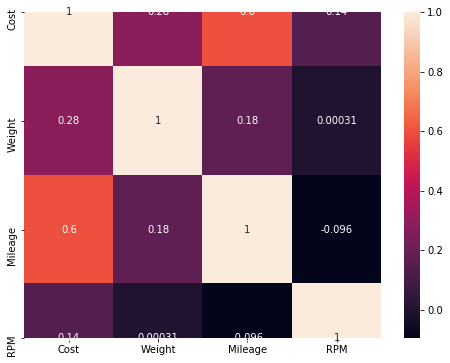

In [181]:
correlation_matrix = shipment_usmx_clean.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(data=correlation_matrix, annot=True)

#### Insights heat map:
Surprisingly, the cost and weight are correlated only by 28%, as expected what impacts the price the most is the mileage by 60%. On the other hand, the RPM co-related with the cost by 14% which makes sense since a lower RPM is always better for the company.

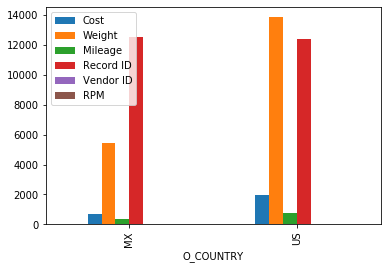

In [88]:
%matplotlib inline
shipment_usmx_clean.groupby('O_COUNTRY').mean().plot(kind='bar')

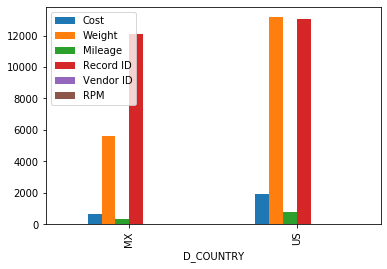

In [89]:
%matplotlib inline
shipment_usmx_clean.groupby('D_COUNTRY').mean().plot(kind='bar')